<a href="https://colab.research.google.com/github/denise25maciel/analiseDadosPython/blob/main/projetoVisualizacaoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'svg'

In [ ]:
df_imdbMovies = pd.read_csv("/content/t_IMDB_movies.csv")

In [ ]:
df_imdbMovies.rename(columns={'RevenueMillions': 'Revenue'}, inplace=True)

In [ ]:
df_imdbMovies.isnull().sum()

ID             0
Id             0
Title          0
Genre          0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue      128
Metascore     64
dtype: int64

In [ ]:
df_imdbMovies.fillna(df_imdbMovies['Revenue'].mean(), inplace = True)
df_imdbMovies.fillna(df_imdbMovies['Metascore'].mean(), inplace = True)

In [ ]:
df_imdbMovies[df_imdbMovies['Revenue']<1]
# O valor da receita em milhões como 0 foi mantido. No entanto o ideal seria a verificação dos valores com o responsável pela coleta

,ID,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
27,27,28,Dead Awake,"Horror,Thriller",Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,5.0,523,0.0,82.943807
68,68,69,Wakefield,Drama,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,8.0,291,0.0,61.000000
97,97,98,The Void,"Horror,Mystery,Sci-Fi",Jeremy Gillespie,"Aaron Poole, Kenneth Welsh,Daniel Fathers, Kat...",2016,90,6.0,9247,0.0,62.000000
152,152,153,White Girl,Drama,Elizabeth Wood,"Morgan Saylor, Brian Marc, Justin Bartha, Adri...",2016,88,6.0,4299,0.0,65.000000
231,231,232,A Kind of Murder,"Crime,Drama,Thriller",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.0,3305,0.0,50.000000
250,250,251,Bonjour Anne,"Comedy,Drama,Romance",Eleanor Coppola,"Diane Lane, Alec Baldwin, Arnaud Viard, Linda ...",2016,92,5.0,178,0.0,50.000000
251,251,252,Kynodontas,"Drama,Thriller",Yorgos Lanthimos,"Christos Stergioglou, Michele Valley, Angeliki...",2009,94,7.0,50946,0.0,73.000000
265,265,266,Knock Knock,"Drama,Horror,Thriller",Eli Roth,"Keanu Reeves, Lorenza Izzo, Ana de Armas, Aaro...",2015,99,5.0,53441,0.0,53.000000
321,321,322,Lovesong,Drama,So Yong Kim,"Riley Keough, Jena Malone, Jessie Ok Gray, Car...",2016,84,6.0,616,0.0,74.000000
327,327,328,A Street Cat Named Bob,"Biography,Comedy,Drama",Roger Spottiswoode,"Luke Treadaway, Bob the Cat, Ruta Gedmintas, J...",2016,103,7.0,12643,0.0,54.000000


In [ ]:
df_imdbMovies['Revenue'].value_counts()
#Runtime

82.943807     128
0.000000       59
1.000000       30
2.000000       22
4.000000       19
             ... 
182.000000      1
210.000000      1
255.000000      1
652.000000      1
333.000000      1
Name: Revenue, Length: 252, dtype: int64

In [ ]:
!pip install seaborn --upgrade

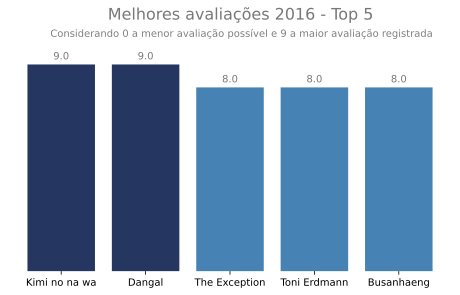

In [ ]:
#gráfico 1
#dados a serem utilizados
df_movie2016=df_imdbMovies.loc[df_imdbMovies['Year'] ==2016, ['Year','Title','Rating']].sort_values('Rating',ascending=False).head(5)
x_dMovie = df_movie2016['Title']
dados = df_movie2016['Rating']

#plotagem
cores = ['#253760','#253760','#4682B4','#4682B4','#4682B4']
fig, ax = plt.subplots(figsize=(8, 4))
fig.text(x = 0.3, y = 1, s= 'Melhores avaliações 2016 - Top 5', fontsize=16, color = '#787878')
fig.text(x = 0.2, y = 0.94, s= 'Considerando 0 a menor avaliação possível e 9 a maior avaliação registrada', fontsize=10, color = '#808080')

barras = ax.bar(x=x_dMovie, height=dados, color = cores )

#funcao posiciona o label acima da respectiva barra
def set_label_y(bar):
    for b in bar:
        alturaBarra = b.get_height()
        ax.annotate(
                    (alturaBarra),
                    xy=(b.get_x() + b.get_width()/2,  alturaBarra),
                    xytext=(0, +3), 
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color='#787878',
                    )
set_label_y(barras)

#Remocao bordas e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

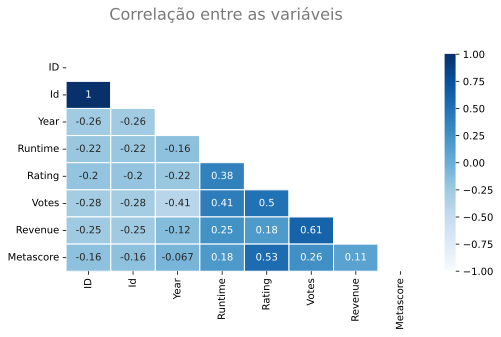

In [ ]:
#grafico 2
#dados a serem utilizados
mask = np.triu(df_imdbMovies.corr())

#plotagem
fig, ax = plt.subplots(figsize=(8, 4))
fig.text(x = 0.2, y = 1, s= 'Correlação entre as variáveis', fontsize=16, color = '#787878')
sns.heatmap(df_imdbMovies.corr(), annot=True, vmin=-1, vmax=+1, cmap='Blues',mask=mask,linewidths=1)

# a máscara foi utilizada como 'triu' (triângulo inferior) em vez de tril (triângulo superior) em consideração ao fato de que
#o olho humano tende a percorrer dados ou escrever da esquerda para a direita. 
#Como ocorre na leitura de livros ou ao escrever.

A quantidade de votos Votes e Rating possuem correlação de 0.5 ( o mesmo ocorre com Votes e RevenueMillions.
Como as amostras da coluna Votes não possuem o mesmo tamanho vamos analizar o tamaho da amostra com o decorrer dos anos.

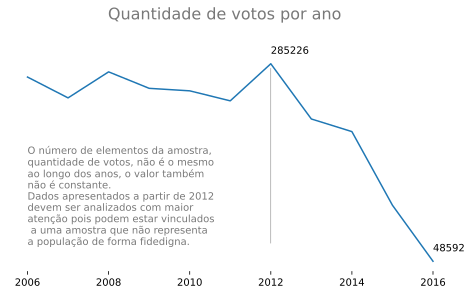

In [ ]:
#gráfico 3
#dados a serem utilizados
x_dYear = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
y_dVotes=df_imdbMovies.groupby(['Year'])['Votes'].mean()

#plotagem
fig, ax = plt.subplots(figsize=(8, 4))
fig.text(x = 0.3, y = 1, s= 'Quantidade de votos por ano', fontsize=16, color = '#787878')
plt.plot(x_dYear,y_dVotes)


t = ("O número de elementos da amostra,\n"
     "quantidade de votos, não é o mesmo\n"
     "ao longo dos anos, o valor também\n"
     "não é constante.\n"
     "Dados apresentados a partir de 2012\n"
     "devem ser analizados com maior\n"
     "atenção pois podem estar vinculados\n "
     "a uma amostra que não representa\n"
     "a população de forma fidedigna.")
plt.text(2006,70000,t,wrap=True, color="#787878")
plt.vlines(2012, 280000, 70000, color ="#787878", linewidth=0.5)

for x,y in zip(x_dYear,y_dVotes):
    if (x== 2012 or x== 2016):
       label = "{:.0f}".format(y)

       plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center


#Remocao bordas e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

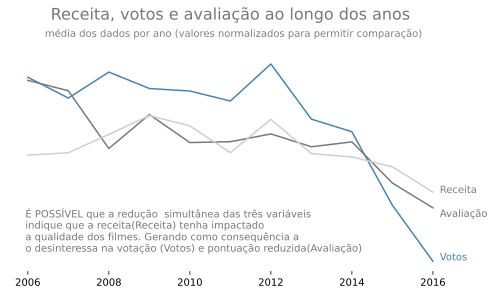

In [ ]:
#gráfico 4
#dados a serem utilizados
# colunas 'Votes', 'Rating' e 'Revenue' estão em diferentes unidades de mensuração. Para que as mesmas sejam comparadas em um mesmo gráfico será realizada normalização das mesmas
scaler = StandardScaler()
df_imdbMovies['VotesNorm'] = scaler.fit_transform(np.asarray(df_imdbMovies.loc[:, 'Votes']).reshape(-1,1))
df_imdbMovies['RatingNorm'] = scaler.fit_transform(np.asarray(df_imdbMovies.loc[:, 'Rating']).reshape(-1,1))
df_imdbMovies['RevenueNorm'] = scaler.fit_transform(np.asarray(df_imdbMovies.loc[:, 'Revenue']).reshape(-1,1))

x_dYear = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
y_dVotes=df_imdbMovies.groupby(['Year'])['VotesNorm'].mean()
y_dRating=df_imdbMovies.groupby(['Year'])['RatingNorm'].mean()
y_dRevenue=df_imdbMovies.groupby(['Year'])['RevenueNorm'].mean()
# apesar de o teorema do limite central afirmar que a média das amostras tende a acertar
#o estimador da população, a média não foi informada no gráfico porque o coeficiente de 
#variação retornou valor elevado (inclusive acima de 100). 
#Segundo a literatura estatística, isso implica que há significativa variação entre os dados,
#logo, não é adequado utilizar a média como parâmetro para a tomada de decisão

#plotagem
fig, ax = plt.subplots(figsize=(8, 4))
fig.text(x = 0.2, y = 1, s= 'Receita, votos e avaliação ao longo dos anos', fontsize=16, color = '#787878')
fig.text(x = 0.19, y = 0.94, s= 'média dos dados por ano (valores normalizados para permitir comparação)', fontsize=10, color = '#808080')

plt.plot(x_dYear,y_dVotes, color='#4682B4')
plt.text(0.97, 0.05, 'Votos', transform=ax.transAxes, color = '#4682B4')
plt.plot(x_dYear,y_dRating, color ="#787878")
plt.text(0.97, 0.25, 'Avaliação', transform=ax.transAxes, color = "#787878")
plt.plot(x_dYear,y_dRevenue, color = "#CFCDCE")
plt.text(0.97, 0.36, 'Receita', transform=ax.transAxes, color = "#808080")

t = ("É POSSÍVEL que a redução  simultânea das três variáveis\n"
     "indique que a receita(Receita) tenha impactado \n"
     "a qualidade dos filmes. Gerando como consequência a  \n"
     "o desinteressa na votação (Votos) e pontuação reduzida(Avaliação)")
plt.text(0.04, 0.09, t, transform=ax.transAxes, color="#787878")

#Remocao bordas e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()
